# Principal Component Analysis (PCA) on Digits Dataset

In this notebook, we explore **Principal Component Analysis (PCA)** for dimensionality reduction using the classic **Digits dataset** from scikit-learn.

PCA is a technique used to reduce the number of input features while retaining most of the dataset’s information. It is often applied to:
- Improve computational efficiency
- Reduce noise and redundancy in the data
- Visualize high-dimensional data in lower dimensions

We will:
1. Train a classification model on the original dataset (64 features).
2. Apply PCA to retain 95% of the dataset’s variance and compare results.
3. Apply PCA with only 2 components (for visualization) and analyze the accuracy drop.


In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

In [4]:
dataset=load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
dataset.data.shape

(1797, 64)

In [6]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

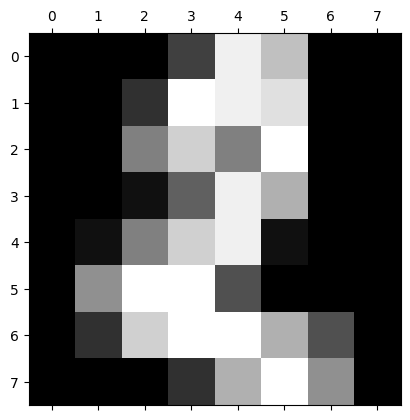

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.gray()
plt.matshow(dataset.data[2].reshape(8,8))

In [11]:
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
df= pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [15]:
X=df
y=dataset.target

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled, y,test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9722222222222222

In [21]:
X.shape

(1797, 64)

In [20]:
from sklearn.decomposition import PCA

pca=PCA(0.95) # retain 95% of info
X_pca=pca.fit_transform(X)
X_pca.shape

(1797, 29)

We get rid of 35 unnecessary columns

In [22]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [23]:
X_train_pca,X_test_pca,y_train,y_test=train_test_split(X_pca,y, test_size=0.2, random_state=42)

In [25]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test)

0.9611111111111111

In [26]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [28]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [29]:
X_train_pca,X_test_pca,y_train,y_test=train_test_split(X_pca,y, test_size=0.2, random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test)

0.6472222222222223

## Results & Analysis

- **Without PCA (64 features)**: Accuracy ≈ **97%**
- **With PCA (95% variance, )**: Accuracy ≈ **96%**
- **With PCA (2 components)**: Accuracy ≈ **64%**

### Interpretation:
- Using all 64 features yields the best accuracy (97%).
- Reducing to 95% variance causes only a slight drop (to 96%), while significantly lowering dimensionality. This is a good trade-off between accuracy and efficiency.
- Reducing to only 2 components leads to major information loss, so accuracy drops sharply. This setting is mainly useful for **visualization**, not classification.


